In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 数据集处理
先查看一下缺失值，只有**Year**和**Publisher**这两个特征存在缺失值，且缺失值个数分别为**271**和**58**，这两个特征也不好填充，将缺失值全部删去还剩下16291条记录，所以选择将缺失值全部删除。

In [4]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_data

Year            271
Publisher        58
Global_Sales      0
Other_Sales       0
JP_Sales          0
EU_Sales          0
NA_Sales          0
Genre             0
Platform          0
Name              0
Rank              0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


为了方便后续的分析、预测，现将**Year**转为数值型：

In [21]:
df.Year = df.Year.astype(int)

# 电子游戏市场分析
## 受欢迎的游戏、类型、发布平台、发行人  

首先可以看一下**Platform**和**Genre**之间的关系：  
可以看到DS和PS2平台上的游戏数量最多。

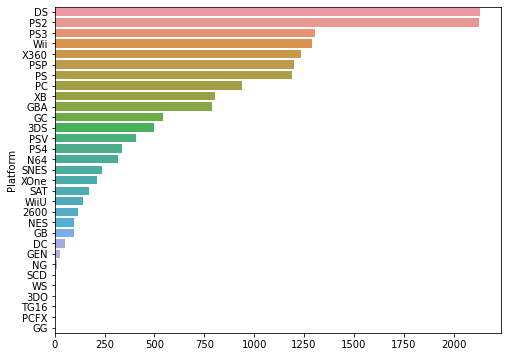

In [18]:
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()